In [11]:
from numpy.linalg import inv
from numpy import dot, transpose
X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]
print(dot(inv(dot(transpose(X),X)), dot(transpose(X),y)))

from numpy.linalg import lstsq
# help(lstsq)
print(lstsq(X,y))

[[1.1875    ]
 [1.01041667]
 [0.39583333]]
(array([[1.1875    ],
       [1.01041667],
       [0.39583333]]), array([8.22916667]), 3, array([26.97402951,  2.46027806,  0.59056212]))


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


In [17]:
from sklearn.linear_model import LinearRegression
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]

model = LinearRegression()
model.fit(X, y)

X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model.predict(X_test)

for i, pred in enumerate(predictions):
    print("预测值：%s, 实际值：%s" %(pred, y_test[i]))
print(model.score(X_test,y_test))

预测值：[10.0625], 实际值：[11]
预测值：[10.28125], 实际值：[8.5]
预测值：[13.09375], 实际值：[15]
预测值：[18.14583333], 实际值：[18]
预测值：[13.3125], 实际值：[11]
0.7701677731318468


原特征
 [[6], [8], [10], [14], [18]]
二次项特征
 [[1.00000000e+00 6.00000000e+00 3.60000000e+01 2.16000000e+02
  1.29600000e+03 7.77600000e+03 4.66560000e+04 2.79936000e+05
  1.67961600e+06 1.00776960e+07]
 [1.00000000e+00 8.00000000e+00 6.40000000e+01 5.12000000e+02
  4.09600000e+03 3.27680000e+04 2.62144000e+05 2.09715200e+06
  1.67772160e+07 1.34217728e+08]
 [1.00000000e+00 1.00000000e+01 1.00000000e+02 1.00000000e+03
  1.00000000e+04 1.00000000e+05 1.00000000e+06 1.00000000e+07
  1.00000000e+08 1.00000000e+09]
 [1.00000000e+00 1.40000000e+01 1.96000000e+02 2.74400000e+03
  3.84160000e+04 5.37824000e+05 7.52953600e+06 1.05413504e+08
  1.47578906e+09 2.06610468e+10]
 [1.00000000e+00 1.80000000e+01 3.24000000e+02 5.83200000e+03
  1.04976000e+05 1.88956800e+06 3.40122240e+07 6.12220032e+08
  1.10199606e+10 1.98359290e+11]]


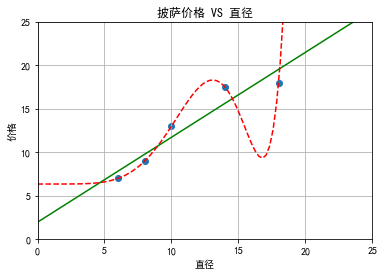

简单线性回归 r-squared值 0.809726797707665
二次多项式回归 r-squared值 -0.09435666704315328


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train = [[6], [8], [10], [14], [18]] # 直径
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]] # 价格
y_test = [[8], [12], [15], [18]]
regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy, c='g',linestyle='-')

# 2次项特征转换器
quadratic_featurizer = PolynomialFeatures(degree=9)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
print("原特征\n",X_train)
print("二次项特征\n",X_train_quadratic)

regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r', linestyle='--')
plt.rcParams['font.sans-serif'] = 'SimHei'  # 消除中文乱码
plt.title('披萨价格 VS 直径')
plt.xlabel('直径')
plt.ylabel('价格')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()

print('简单线性回归 r-squared值', regressor.score(X_test, y_test))
print('二次多项式回归 r-squared值', regressor_quadratic.score(X_test_quadratic, y_test))

[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]


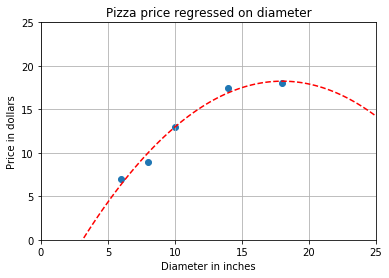

[[6], [8], [10], [14], [18]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]
[[6], [8], [11], [16]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  11. 121.]
 [  1.  16. 256.]]
Simple linear regression r-squared 0.809726797707665
Quadratic regression r-squared 0.8675443656345054
